In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

In [4]:
data= pd.read_csv(r'C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\cleaned_final_dataset.csv')
print(data.head())

                                      kroger_product  \
0  horizon organic shelf-stable 1% low fat milk b...   
1                  kroger® 2% reduced fat milk quart   
2             kroger® fat free skim milk half gallon   
3           kroger® vitamin d whole milk half gallon   
4  simple truth organic® 100% grassfed whole milk...   

                                    description  calories  protein    fat  \
0                 strawberry milk, low fat (1%)      69.0     3.13   0.89   
1                        milk, reduced fat (2%)      50.0     3.36   1.90   
2                         milk, fat free (skim)      34.0     3.43   0.08   
3        milk, dry, whole, with added vitamin d    1014.0    26.30  26.70   
4  simple truth organic, 100% whole wheat bread     233.0     9.30   3.49   

   carbohydrates  
0          12.30  
1           4.90  
2           4.92  
3          38.40  
4          46.50  


In [8]:
data['healthy'] = (data['calories'] < 120).astype(int)

features = ['calories', 'protein', 'fat']
X_raw = data[features]
y = data['healthy']

In [9]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_raw)

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X_raw, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training Features Shape: {X_train_scaled.shape}")
print(f"Testing Features Shape: {X_test_scaled.shape}")

Training Features Shape: (975, 3)
Testing Features Shape: (244, 3)


In [15]:
svm_linear_01 = SVC(kernel='linear', C=0.1)

svm_linear_01.fit(X_train_scaled, y_train)

y_pred_linear_01 = svm_linear_01.predict(X_test_scaled)

[[180   8]
 [  3  53]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       188
           1       0.87      0.95      0.91        56

    accuracy                           0.95       244
   macro avg       0.93      0.95      0.94       244
weighted avg       0.96      0.95      0.96       244



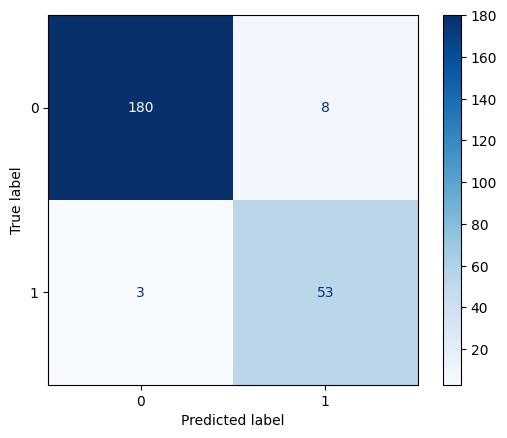

In [16]:
cm_linear_01 = confusion_matrix(y_test, y_pred_linear_01)
cr_linear_01 = classification_report(y_test, y_pred_linear_01)

print(cm_linear_01)

print(cr_linear_01)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_linear_01)
disp.plot(cmap='Blues')

plt.show()

[[185   3]
 [  3  53]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       188
           1       0.95      0.95      0.95        56

    accuracy                           0.98       244
   macro avg       0.97      0.97      0.97       244
weighted avg       0.98      0.98      0.98       244



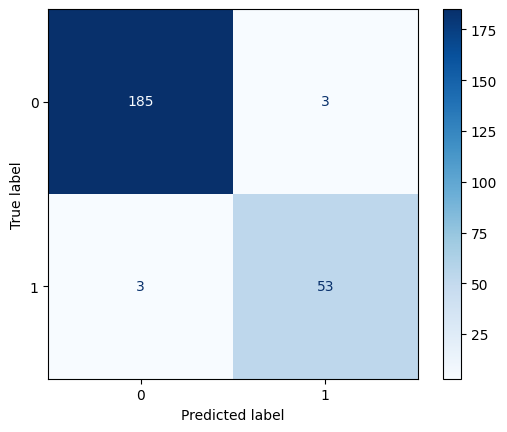

[[187   1]
 [  0  56]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       188
           1       0.98      1.00      0.99        56

    accuracy                           1.00       244
   macro avg       0.99      1.00      0.99       244
weighted avg       1.00      1.00      1.00       244



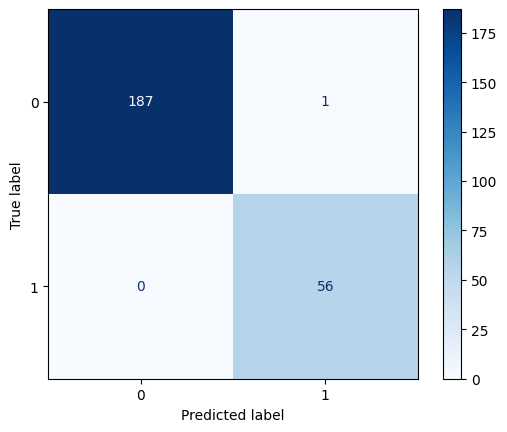

In [17]:
svm_linear_1 = SVC(kernel='linear', C=1)
svm_linear_1.fit(X_train_scaled, y_train)
y_pred_linear_1 = svm_linear_1.predict(X_test_scaled)

cm_linear_1 = confusion_matrix(y_test, y_pred_linear_1)
cr_linear_1 = classification_report(y_test, y_pred_linear_1)

print(cm_linear_1)

print(cr_linear_1)

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_linear_1)
disp1.plot(cmap='Blues')

plt.show()

svm_linear_10 = SVC(kernel='linear', C=10)
svm_linear_10.fit(X_train_scaled, y_train)
y_pred_linear_10 = svm_linear_10.predict(X_test_scaled)

cm_linear_10 = confusion_matrix(y_test, y_pred_linear_10)
cr_linear_10 = classification_report(y_test, y_pred_linear_10)

print(cm_linear_10)

print(cr_linear_10)

disp10 = ConfusionMatrixDisplay(confusion_matrix=cm_linear_10)
disp10.plot(cmap='Blues')

plt.show()


[[188   0]
 [ 14  42]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       188
           1       1.00      0.75      0.86        56

    accuracy                           0.94       244
   macro avg       0.97      0.88      0.91       244
weighted avg       0.95      0.94      0.94       244



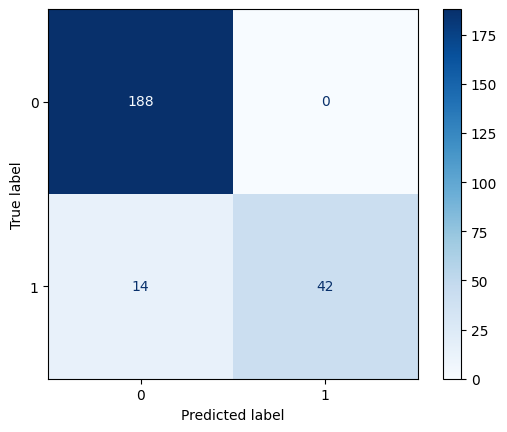

In [18]:
svm_poly_01 = SVC(kernel='poly', degree=3, C=0.1)  
svm_poly_01.fit(X_train_scaled, y_train)
y_pred_poly_01 = svm_poly_01.predict(X_test_scaled)

cm_poly_01 = confusion_matrix(y_test, y_pred_poly_01)
cr_poly_01 = classification_report(y_test, y_pred_poly_01)


print(cm_poly_01)

print(cr_poly_01)

disp_poly_01 = ConfusionMatrixDisplay(confusion_matrix=cm_poly_01)
disp_poly_01.plot(cmap='Blues')

plt.show()

[[187   1]
 [  5  51]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       188
           1       0.98      0.91      0.94        56

    accuracy                           0.98       244
   macro avg       0.98      0.95      0.96       244
weighted avg       0.98      0.98      0.98       244



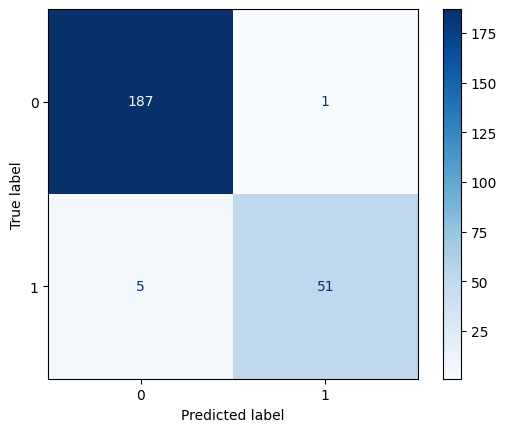

[[187   1]
 [  4  52]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       188
           1       0.98      0.93      0.95        56

    accuracy                           0.98       244
   macro avg       0.98      0.96      0.97       244
weighted avg       0.98      0.98      0.98       244



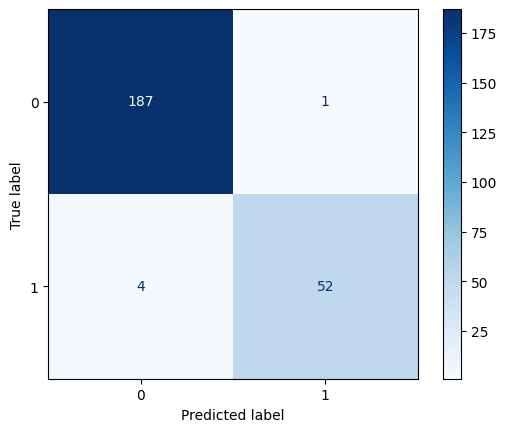

In [19]:
svm_poly_1 = SVC(kernel='poly', degree=3, C=1)
svm_poly_1.fit(X_train_scaled, y_train)
y_pred_poly_1 = svm_poly_1.predict(X_test_scaled)

cm_poly_1 = confusion_matrix(y_test, y_pred_poly_1)
cr_poly_1 = classification_report(y_test, y_pred_poly_1)

print(cm_poly_1)

print(cr_poly_1)

disp_poly_1 = ConfusionMatrixDisplay(confusion_matrix=cm_poly_1)
disp_poly_1.plot(cmap='Blues')

plt.show()

svm_poly_10 = SVC(kernel='poly', degree=3, C=10)
svm_poly_10.fit(X_train_scaled, y_train)
y_pred_poly_10 = svm_poly_10.predict(X_test_scaled)

cm_poly_10 = confusion_matrix(y_test, y_pred_poly_10)
cr_poly_10 = classification_report(y_test, y_pred_poly_10)

print(cm_poly_10)

print(cr_poly_10)

disp_poly_10 = ConfusionMatrixDisplay(confusion_matrix=cm_poly_10)
disp_poly_10.plot(cmap='Blues')

plt.show()


[[181   7]
 [  4  52]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       188
           1       0.88      0.93      0.90        56

    accuracy                           0.95       244
   macro avg       0.93      0.95      0.94       244
weighted avg       0.96      0.95      0.96       244



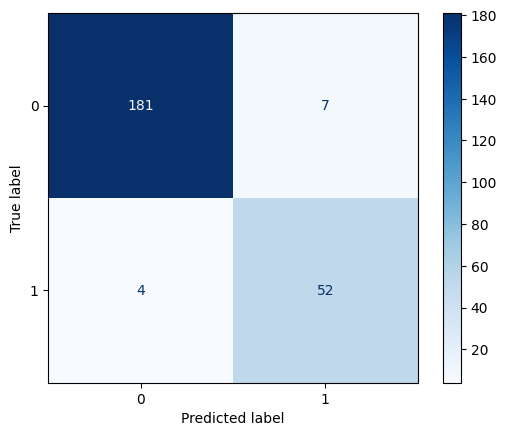

[[187   1]
 [  2  54]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       188
           1       0.98      0.96      0.97        56

    accuracy                           0.99       244
   macro avg       0.99      0.98      0.98       244
weighted avg       0.99      0.99      0.99       244



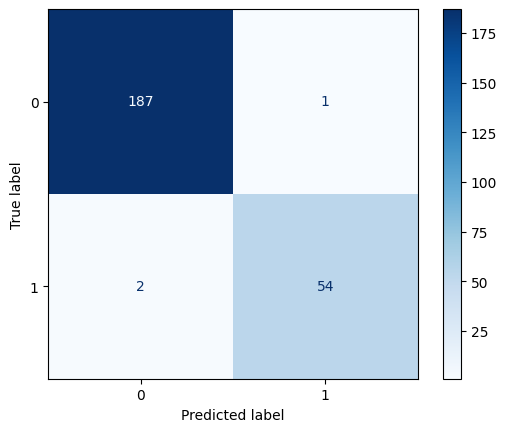

[[187   1]
 [  2  54]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       188
           1       0.98      0.96      0.97        56

    accuracy                           0.99       244
   macro avg       0.99      0.98      0.98       244
weighted avg       0.99      0.99      0.99       244



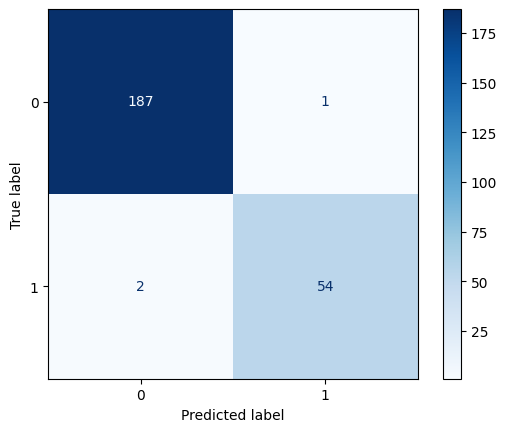

In [20]:
svm_rbf_01 = SVC(kernel='rbf', C=0.1)
svm_rbf_01.fit(X_train_scaled, y_train)
y_pred_rbf_01 = svm_rbf_01.predict(X_test_scaled)

cm_rbf_01 = confusion_matrix(y_test, y_pred_rbf_01)
cr_rbf_01 = classification_report(y_test, y_pred_rbf_01)


print(cm_rbf_01)

print(cr_rbf_01)

disp_rbf_01 = ConfusionMatrixDisplay(confusion_matrix=cm_rbf_01)
disp_rbf_01.plot(cmap='Blues')

plt.show()

svm_rbf_1 = SVC(kernel='rbf', C=1)
svm_rbf_1.fit(X_train_scaled, y_train)
y_pred_rbf_1 = svm_rbf_1.predict(X_test_scaled)

cm_rbf_1 = confusion_matrix(y_test, y_pred_rbf_1)
cr_rbf_1 = classification_report(y_test, y_pred_rbf_1)


print(cm_rbf_1)

print(cr_rbf_1)

disp_rbf_1 = ConfusionMatrixDisplay(confusion_matrix=cm_rbf_1)
disp_rbf_1.plot(cmap='Blues')

plt.show()


svm_rbf_10 = SVC(kernel='rbf', C=10)
svm_rbf_10.fit(X_train_scaled, y_train)
y_pred_rbf_10 = svm_rbf_10.predict(X_test_scaled)

cm_rbf_10 = confusion_matrix(y_test, y_pred_rbf_10)
cr_rbf_10 = classification_report(y_test, y_pred_rbf_10)

print(cm_rbf_10)

print(cr_rbf_10)

disp_rbf_10 = ConfusionMatrixDisplay(confusion_matrix=cm_rbf_10)
disp_rbf_10.plot(cmap='Blues')

plt.show()


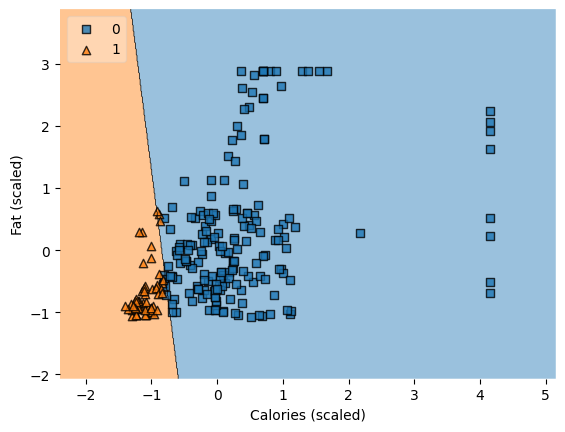

In [21]:
X_vis = data[['calories', 'fat']].values
y_vis = data['healthy'].values

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42, stratify=y_vis
)

scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)
X_test_vis_scaled = scaler_vis.transform(X_test_vis)

svm_linear_vis = SVC(kernel='linear', C=1)
svm_linear_vis.fit(X_train_vis_scaled, y_train_vis)

plot_decision_regions(X_test_vis_scaled, y_test_vis, clf=svm_linear_vis, legend=2)

plt.xlabel('Calories (scaled)')
plt.ylabel('Fat (scaled)')
plt.show()

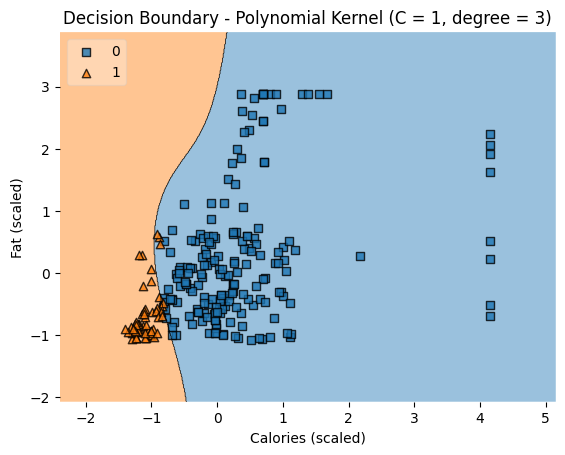

In [22]:
svm_poly_vis = SVC(kernel='poly', degree=3, C=1)
svm_poly_vis.fit(X_train_vis_scaled, y_train_vis)

plot_decision_regions(X_test_vis_scaled, y_test_vis, clf=svm_poly_vis, legend=2)
plt.title("Decision Boundary - Polynomial Kernel (C = 1, degree = 3)")
plt.xlabel('Calories (scaled)')
plt.ylabel('Fat (scaled)')
plt.show()

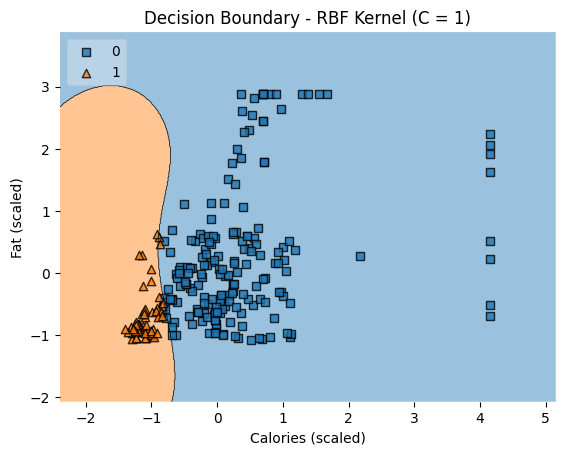

In [23]:
svm_rbf_vis = SVC(kernel='rbf', C=1)
svm_rbf_vis.fit(X_train_vis_scaled, y_train_vis)

plot_decision_regions(X_test_vis_scaled, y_test_vis, clf=svm_rbf_vis, legend=2)
plt.title("Decision Boundary - RBF Kernel (C = 1)")
plt.xlabel('Calories (scaled)')
plt.ylabel('Fat (scaled)')
plt.show()


In [24]:
print("Sample Training Data:")
print(pd.DataFrame(X_train_scaled, columns=features).head())
print(y_train.head())

print("\nSample Testing Data:")
print(pd.DataFrame(X_test_scaled, columns=features).head())
print(y_test.head())


Sample Training Data:
   calories   protein       fat
0  0.786036  1.096852  0.195311
1  0.697003  1.480119  2.878190
2 -0.894463  0.704808 -0.740805
3  0.897327  0.900830  0.306022
4 -0.087601 -1.062314  0.244516
1006    0
158     0
542     1
1041    0
772     0
Name: healthy, dtype: int64

Sample Testing Data:
   calories   protein       fat
0  4.152599  0.734065  1.635775
1 -0.182199  0.763322  0.381059
2  0.279660  0.464901  0.665215
3  0.808294  2.710375  2.878190
4 -1.154885 -0.228490 -0.946235
110     0
662     0
1071    0
181     0
318     1
Name: healthy, dtype: int64
